In [31]:
import numpy as np

In [32]:
x = np.arange(24).reshape(4, 6)

In [33]:
# numpy 에서는 안 된다!!!!
x[lambda x: x>1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
# 넘파이는 None을 어떻게 할까?
y = np.array([None, 1, 2, 3])

In [44]:
# None을 인정해준다
y

array([None, 1, 2, 3], dtype=object)

In [45]:
# None값 때문에 에러가 난다. 그럼 처리를 해주는 무언가가 있을거야.
y.sum()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [46]:
import numpy.ma as ma

In [51]:
# mask = 비어있다고 인식.
# 마스크 할 것들을 True로 알려줌
a = ma.array([1, 2, 3], mask=[True, False, False])

In [52]:
a

masked_array(data=[--, 2, 3],
             mask=[ True, False, False],
       fill_value=999999)

In [53]:
# masking 안 된거 몇개?
a.count()

2

In [54]:
# 마스크 데이터 제외하고 계산
a.sum()

5

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

# info
- missing data를 한번에 알 수 있다.
- missing data는 비어있는 data이다.
- type 을 확인한다. type별로 알 수 있는 정보가 다르다.
- 전체 데이터 크기 알 수 있다.
- 한번에 메모리에 다 올리기 때문에 이때 나온 메모리보다 큰 것을 올리기(?) 어렵다
- 차원의 저주, 데이터 양이 적으면 오버피팅 조심해야한다는 것을 알 수 있다.

# Columns
- structured array
- record array
- fancy indexing
- select_dtypes
- filter

# rows
- loc: 인덱스 이름으로 가져온다.
- loc는 0부터 시작하지 않을 수 있다.
- iloc는 python처럼 가져온다 무조건 0부터 시작함
- iloc[0:3] : 0,1,2 번째 행을 가져옴

In [34]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [37]:
# 숫자형 컬럼만 나온다
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [39]:
# 카데고리 데이터 볼 수 있다.
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Columns
- structured array
- record array
- fancy indexing
- select_dtypes
- filter

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
tips.select_dtypes(['category'])

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


# rows
- loc: 인덱스 이름으로 가져온다.
- loc는 0부터 시작하지 않을 수 있다.
- iloc는 python처럼 가져온다 무조건 0부터 시작함
- iloc[0:3] : 0,1,2 번째 행을 가져옴

In [9]:
tips.loc[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [13]:
tips[tips.sex=='Male'].loc[0]

KeyError: 0

In [12]:
tips[tips.sex=='Male'].loc[0:5]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4


In [10]:
tips[tips.sex=='Male'].loc[1:5]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4


In [11]:
tips[tips.sex=='Male'].iloc[0]

total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 1, dtype: object

In [16]:
tips.loc[0:3, 'tip':'time']

,tip,sex,smoker,day,time
0,1.01,Female,No,Sun,Dinner
1,1.66,Male,No,Sun,Dinner
2,3.50,Male,No,Sun,Dinner
3,3.31,Male,No,Sun,Dinner


In [22]:
tips[tips.sex=='Male'].iloc[0:3]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [15]:
tips.iloc[0:3, 0:3]

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male


In [23]:
tips.at[0, 'smoker']

'No'

In [25]:
tips.iat[0, 3]

'No'

In [27]:
tips.loc[lambda x: x['tip']>1]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
tips.loc[lambda x: x['tip']>1]['size'] = 5

C:\Users\dlel2\AppData\Local\Temp/ipykernel_26092/291881131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips.loc[lambda x: x['tip']>1]['size'] = 5


- 담배 피는 여부와 성별에 따라 팁을 누가 더 많이 줄까?

In [36]:
tips.groupby(['sex', 'smoker'])[['tip', 'total_bill']].mean()

tip  total_bill
sex    smoker                      
Male   Yes     3.051167   22.284500
       No      3.113402   19.791237
Female Yes     2.931515   17.977879
       No      2.773519   18.105185

In [40]:
tips[tips.sex=='Male'].describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [41]:
tips[tips.sex=='Male'].count()

total_bill    157
tip           157
sex           157
smoker        157
day           157
time          157
size          157
dtype: int64

In [55]:
mpg = sns.load_dataset('mpg')

In [56]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [58]:
# element-wise 연산을 위해 이건 나중에 중요하게 쓰일 것이다...
mpg.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [59]:
mpg.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [60]:
# numpy
mpg.columns[mpg.isna().any()]

Index(['horsepower'], dtype='object')

In [61]:
# 비어있는 통계값 어떻게 처리될까?
# skipna=None가 sum의 default값
mpg.horsepower.sum()

40952.0

In [63]:
mpg.horsepower.sum(skipna=False)

nan

In [64]:
mpg.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [65]:
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


# missing data

In [66]:
!pip install -U missingno

In [67]:
import missingno as mino

In [68]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<AxesSubplot:>

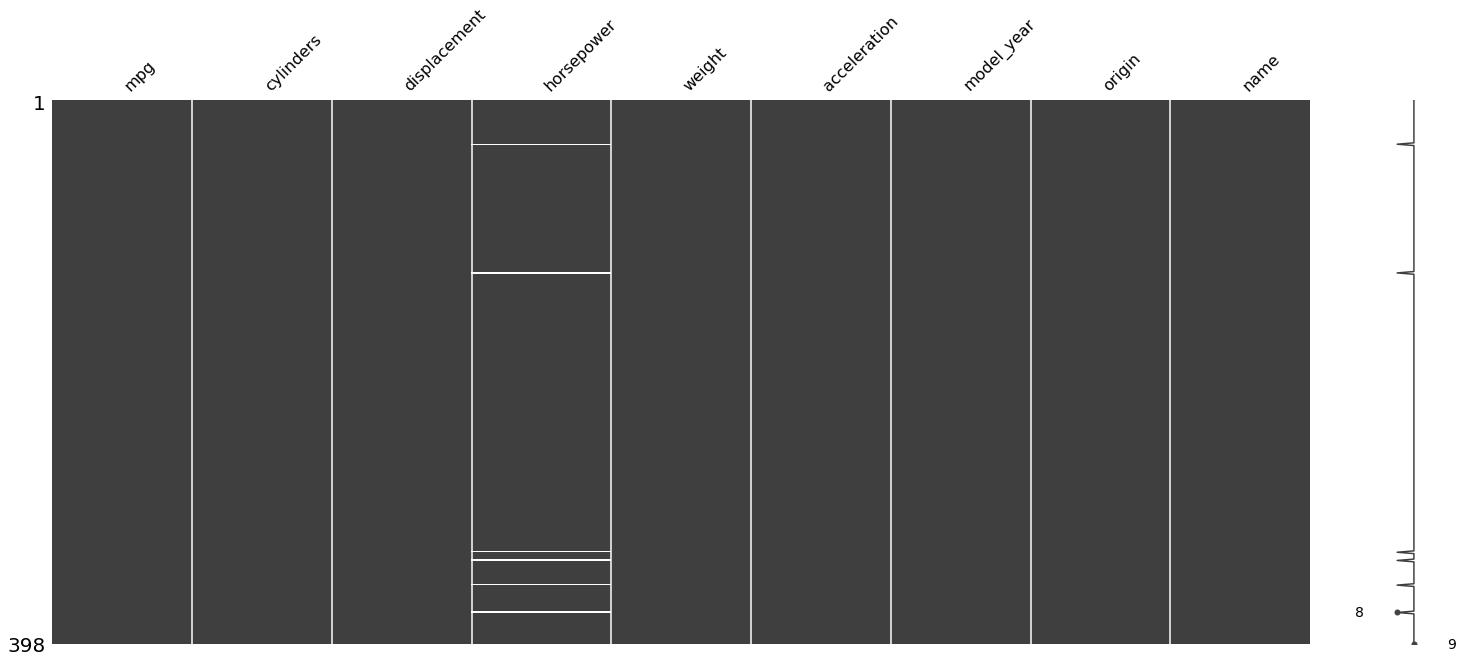

In [70]:
# pandas하고 연동된다
mino.matrix(mpg)

In [72]:
# -U는 이미 설치되어 있다면 최신판 다운 받으라는 거
!pip install -U sidetable

In [73]:
mpg.stb

AttributeError: 'DataFrame' object has no attribute 'stb'

In [74]:
import sidetable

In [75]:
# sidetable을 import하면 stb가 생긴다.
mpg.stb

In [77]:
# count가 더 친절하다 확장해서 알려준다
mpg.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
origin,398,3,usa,249,europe,70
cylinders,398,5,4,204,5,3
model_year,398,13,73,40,74,27
displacement,398,82,97.0,21,80.0,1
horsepower,392,93,150.0,22,66.0,1
acceleration,398,95,14.5,23,21.8,1
mpg,398,129,13.0,20,32.2,1
name,398,305,ford pinto,6,mazda glc deluxe,1
weight,398,351,1985,4,3245,1


In [82]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [81]:
mpg.stb.freq(['origin'])

,origin,count,percent,cumulative_count,cumulative_percent
0,usa,249,62.562814,249,62.562814
1,japan,79,19.849246,328,82.412060
2,europe,70,17.587940,398,100.000000
